In [255]:
#load libraries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [256]:
#First, load CCG file from the ODS https://files.digital.nhs.uk/assets/ods/current/eccg.zip
import pandas as pd
path = '/Users/michaelshemko/Downloads/eccg/' 
filename_ccg=path + 'eccg.csv'
lookup_ccg = pd.read_csv(filename_ccg, names=["org_code", "name", "national_group", "high_geog", "address1", "address2", "address3", "address4", "address5", "postcode", "open_date", "close_date", "col3", "orgsub", "col15", "col16", "col17", "col18", "col19", "col20", "col21", "col22", "col23", "col24", "col25", "col26", "col27"])

In [257]:
#This gives us all the CCGs, which we can use to map the London CCGs
#We need CCG codes for London, which we will then map to a subset of 
#London GP practices
lookup_ccg.shape

(243, 27)

In [258]:
#List of all CCGs
lookup_ccg

,org_code,name,national_group,high_geog,address1,address2,address3,address4,address5,postcode,...,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27
0,00C,NHS DARLINGTON CCG,Y54,Q74,C/O BILLINGHAM HEALTH CENTRE,QUEENSWAY,NaN,BILLINGHAM,CLEVELAND,TS23 2LA,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,00D,"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",Y54,Q74,SEDGEFIELD COMMUNITY HOSPITAL,SALTERS LANE,SEDGEFIELD,STOCKTON-ON-TEES,CLEVELAND,TS21 3EE,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,00J,NHS NORTH DURHAM CCG,Y54,Q74,SEDGEFIELD COMMUNITY HOSPITAL,SALTERS LANE,SEDGEFIELD,STOCKTON-ON-TEES,CLEVELAND,TS21 3EE,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,00K,NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,Y54,Q74,BILLINGHAM HEALTH CENTRE,QUEENSWAY,NaN,BILLINGHAM,CLEVELAND,TS23 2LA,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,00L,NHS NORTHUMBERLAND CCG,Y54,Q74,COUNTY HALL,NaN,NaN,MORPETH,NORTHUMBERLAND,NE61 2EF,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5,00M,NHS SOUTH TEES CCG,Y54,Q74,NORTH ORMESBY HEALTH VILLAGE,11 TRINITY MEWS,NORTH ORMESBY,MIDDLESBROUGH,CLEVELAND,TS3 6AL,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
6,00N,NHS SOUTH TYNESIDE CCG,Y54,Q74,MONKTON HALL,MONKTON LANE,MONKTON VILLAGE,JARROW,TYNE AND WEAR,NE32 5NN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
7,00P,NHS SUNDERLAND CCG,Y54,Q74,PEMBERTON HOUSE,COLIMA AVENUE,NaN,SUNDERLAND,TYNE AND WEAR,SR5 3XB,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
8,00Q,NHS BLACKBURN WITH DARWEN CCG,Y54,Q84,FUSION HOUSE,EVOLUTION PARK,HASLINGDEN ROAD,BLACKBURN,LANCASHIRE,BB1 2FD,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
9,00R,NHS BLACKPOOL CCG,Y54,Q84,THE STADIUM,SEASIDERS WAY,NaN,BLACKPOOL,LANCASHIRE,FY1 6JX,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [259]:
#Obtained list of London CCG names from NHS England website https://www.england.nhs.uk/london/ccg-trust/
london = ['NHS BARKING AND DAGENHAM CCG','NHS BARNET CCG','NHS BEXLEY CCG','NHS BRENT CGG','NHS BROMLEY CGG','NHS CAMDEN CCG','NHS CENTRAL LONDON CGG','NHS CITY AND HACKNEY CCG','NHS CROYDON CCG','NHS EALING CCG','NHS ENFIELD CCG','NHS GREENWICH CCG','NHS HAMMERSMITH AND FULHAM CCG','NHS HARINGEY CCG','NHS HARROW CCG','NHS HAVERING CCG','NHS HILLINGDON CCG','NHS HOUNSLOW CCG','NHS ISLINGTON CCG','NHS KINGSTON CCG','NHS LAMBETH CCG','NHS LEWISHAM CCG','NHS MERTON CCG','NHS NEWHAM CCG','NHS REDBRIDGE CCG','NHS RICHMOND CCG','NHS SOUTHWARK CCG','NHS SUTTON CCG','NHS TOWER HAMLETS CGG','NHS WALTHAM FOREST CCG','NHS WANDSWORTH CCG','NHS WEST LONDON CCG']
lookup_ccg.name.isin(london)
london_lookup= lookup_ccg[lookup_ccg.name.isin(london)]
london_lookup.shape

(28, 27)

In [260]:
#Now we have a subset of just London CCGs along with their codes
london_lookup

,org_code,name,national_group,high_geog,address1,address2,address3,address4,address5,postcode,...,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27
115,07L,NHS BARKING AND DAGENHAM CCG,Y56,Q71,BARKING HOSPITAL,UPNEY LANE,NaN,BARKING,ESSEX,IG11 9LX,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
116,07M,NHS BARNET CCG,Y56,Q71,"GROUND FLOOR, BUILDING 2",NORTH LONDON BUSINESS PARK,"OAKLEIGH ROAD SOUTH, NEW SOUTHGATE",LONDON,GREATER LONDON,N11 1NP,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
117,07N,NHS BEXLEY CCG,Y56,Q71,CIVIC OFFICES,2 WATLING STREET,NaN,BEXLEYHEATH,KENT,DA6 7AT,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
120,07R,NHS CAMDEN CCG,Y56,Q71,4TH FLOOR,STEPHENSON HOUSE,75 HAMPSTEAD ROAD,LONDON,GREATER LONDON,NW1 2PL,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
121,07T,NHS CITY AND HACKNEY CCG,Y56,Q71,SECOND FLOOR,THE LAWSON PRACTICE,85 NUTTALL STREET,LONDON,GREATER LONDON,N1 5HZ,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
122,07V,NHS CROYDON CCG,Y56,Q71,LEON HOUSE,233 HIGH STREET,NaN,CROYDON,SURREY,CR0 9XT,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
123,07W,NHS EALING CCG,Y56,Q71,PERCEVAL HOUSE,14-16 UXBRIDGE ROAD,NaN,LONDON,GREATER LONDON,W5 2HL,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
124,07X,NHS ENFIELD CCG,Y56,Q71,HOLBROOK HOUSE,COCKFOSTERS ROAD,NaN,BARNET,HERTFORDSHIRE,EN4 0DY,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
125,07Y,NHS HOUNSLOW CCG,Y56,Q71,SOVEREIGN COURT,15-21 STAINES ROAD,NaN,HOUNSLOW,MIDDLESEX,TW3 3HR,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
126,08A,NHS GREENWICH CCG,Y56,Q71,THE WOOLWICH CENTRE,35 WELLINGTON STREET,WOOLWICH,LONDON,GREATER LONDON,SE18 6ND,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [261]:
#Now we just extract the London CCG codes for use later
london_lookup.org_code

115    07L
116    07M
117    07N
120    07R
121    07T
122    07V
123    07W
124    07X
125    07Y
126    08A
127    08C
128    08D
129    08E
130    08F
131    08G
132    08H
133    08J
134    08K
135    08L
136    08M
137    08N
138    08P
139    08Q
140    08R
141    08T
143    08W
144    08X
145    08Y
Name: org_code, dtype: object

In [262]:
#Next, we can use that list of CCG codes to get the subset of GP practices from the ODS GP practice file
#the file gp-reg-pat-prac-all.csv is from April 2018 practice list on nhs digital
#april 2018 list of all gp practices and number of patients on list

path = '/Users/michaelshemko/Downloads/'
gp_prac_filename=path + 'gp-reg-pat-prac-all.csv'
gp_practices = pd.read_csv(gp_prac_filename)

gp_practices.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [263]:
#Now, we can select the subset of gp practices in london, using our previous list of all london CCGs

london_ccgs = ['07L','07M','07N','07R','07T','07V','07W','07X','07Y','08A','08C','08D','08E','08F','08G','08H','08J','08K','08L','08M','08N','08P','08Q','08R','08T','08W','08X','08Y']
gp_practices.CCG_CODE.isin(london_ccgs)

london_gplookup= gp_practices[gp_practices.CCG_CODE.isin(london_ccgs)]

london_gplookup.shape


(1143, 10)

In [264]:
#Exploring the subset of data we can see that these are London GP practices
#a total of 1,143, including the number of patients at each practice
london_gplookup.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3628,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
3629,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82003,RM10 9AT,ALL,ALL,5307
3630,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82005,RM10 9RR,ALL,ALL,6010
3631,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82012,RM9 5TT,ALL,ALL,4105
3632,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,F82015,RM9 6HT,ALL,ALL,5795


In [357]:
total_patients_london = london_gplookup['NUMBER_OF_PATIENTS'].sum()

In [358]:
total_patients_london

8566907

(array([630., 437.,  68.,   6.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 7.22360e+03, 1.44462e+04, 2.16688e+04, 2.88914e+04,
        3.61140e+04, 4.33366e+04, 5.05592e+04, 5.77818e+04, 6.50044e+04,
        7.22270e+04]),
 <a list of 10 Patch objects>)

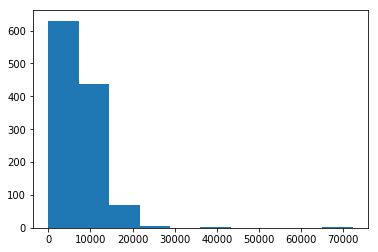

In [265]:
#Exploring a rough histogram of practice lists, we see that a few
#practices have very large lists (70k, 40k, ~25k,) and the majority
#of practices have lists of between low thousands to 10-15k)
#this makes sense and seems to fit what we expect
x = london_gplookup.NUMBER_OF_PATIENTS

plt.hist(x)

In [266]:
#quick look at data types in order to do a sum calculation on the number of patients at each GP practice
london_gplookup.dtypes

PUBLICATION           object
EXTRACT_DATE          object
TYPE                  object
CCG_CODE              object
ONS_CCG_CODE          object
CODE                  object
POSTCODE              object
SEX                   object
AGE                   object
NUMBER_OF_PATIENTS     int64
dtype: object

In [267]:
#not sure if this is necessary step,but tried sum previously and did not work until after I did this step
london_gplookup.NUMBER_OF_PATIENTS = london_gplookup.NUMBER_OF_PATIENTS.astype(int)


/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [268]:
london_gplookup.dtypes

PUBLICATION           object
EXTRACT_DATE          object
TYPE                  object
CCG_CODE              object
ONS_CCG_CODE          object
CODE                  object
POSTCODE              object
SEX                   object
AGE                   object
NUMBER_OF_PATIENTS     int64
dtype: object

In [269]:
#Thus, the answer to question 1 in the assignment is
#1a.  The total number of patients registered at GP practices in London
#as at 1 Apr 2018 is 8,566,907
Total_Patients = london_gplookup.NUMBER_OF_PATIENTS.sum()
print(Total_Patients)

8566907


In [270]:
#next, we bring in the total prescription data for April 2018 (all practices)
#provided in the assignment files, but also downloadable from 
#https://digital.nhs.uk/data-and-information/publications/statistical/practice-level-prescribing-data/april-2018
path = '/Users/michaelshemko/Downloads/'
april_presc_filename=path + 'T201804PDPI+BNFT.CSV'
april_presc = pd.read_csv(april_presc_filename)

april_presc.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,prescr,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [271]:
#next, we need the practice codes from all london gp practices
#we already have the London GP codes from a previous step
london_gplookup.CODE

3628    F82001
3629    F82003
3630    F82005
3631    F82012
3632    F82015
3633    F82017
3634    F82018
3635    F82025
3636    F82027
3637    F82034
3638    F82038
3639    F82040
3640    F82042
3641    F82051
3642    F82604
3643    F82612
3644    F82621
3645    F82625
3646    F82634
3647    F82642
3648    F82647
3649    F82650
3650    F82660
3651    F82661
3652    F82668
3653    F82676
3654    F82677
3655    F82678
3656    F82679
3657    F82680
         ...  
4885    E87050
4886    E87057
4887    E87061
4888    E87063
4889    E87065
4890    E87067
4891    E87637
4892    E87665
4893    E87682
4894    E87701
4895    E87702
4896    E87706
4897    E87711
4898    E87715
4899    E87720
4900    E87722
4901    E87733
4902    E87735
4903    E87738
4904    E87742
4905    E87746
4906    E87750
4907    E87751
4908    E87755
4909    E87762
4910    Y00200
4911    Y00507
4912    Y01011
4913    Y02842
4914    Y03441
Name: CODE, Length: 1143, dtype: object

In [272]:
london_gp_codes = london_gplookup.CODE

In [273]:
#now we use the London GP codes to select the subset of rows from
#the prescribing data, which gives us the april london gp precribing data
london_gps = ["F82001", "F82003", "F82005", "F82012", "F82015", "F82017", "F82018", "F82025", "F82027", "F82034", "F82038", "F82040", "F82042", "F82051", "F82604", "F82612", "F82621", "F82625", "F82634", "F82642", "F82647", "F82650", "F82660", "F82661", "F82668", "F82676", "F82677", "F82678", "F82679", "F82680", "F86040", "Y01280", "Y01719", "Y01795", "Y02575", "Y02583", "Y04786", "E83003", "E83005", "E83006", "E83007", "E83008", "E83009", "E83010", "E83011", "E83012", "E83013", "E83016", "E83017", "E83018", "E83020", "E83021", "E83024", "E83025", "E83026", "E83027", "E83028", "E83030", "E83031", "E83032", "E83034", "E83035", "E83036", "E83037", "E83038", "E83039", "E83041", "E83044", "E83045", "E83046", "E83049", "E83050", "E83053", "E83600", "E83613", "E83621", "E83622", "E83624", "E83629", "E83631", "E83632", "E83633", "E83637", "E83638", "E83639", "E83644", "E83649", "E83650", "E83653", "E83657", "E83668", "Y00105", "Y00316", "Y01697", "Y02986", "Y03663", "Y03664", "G83002", "G83004", "G83005", "G83006", "G83009", "G83010", "G83018", "G83024", "G83025", "G83028", "G83029", "G83033", "G83037", "G83046", "G83047", "G83049", "G83052", "G83053", "G83057", "G83061", "G83062", "G83064", "G83066", "G83630", "G83642", "G83672", "F83003", "F83005", "F83006", "F83011", "F83017", "F83018", "F83019", "F83020", "F83022", "F83023", "F83025", "F83042", "F83043", "F83044", "F83048", "F83050", "F83052", "F83055", "F83057", "F83058", "F83059", "F83061", "F83615", "F83623", "F83632", "F83633", "F83635", "F83658", "F83665", "F83672", "F83677", "F83682", "F83683", "Y02674", "F84003", "F84008", "F84013", "F84015", "F84018", "F84021", "F84033", "F84035", "F84036", "F84038", "F84041", "F84043", "F84060", "F84063", "F84069", "F84072", "F84080", "F84096", "F84105", "F84115", "F84117", "F84119", "F84601", "F84619", "F84620", "F84621", "F84624", "F84632", "F84635", "F84636", "F84640", "F84659", "F84668", "F84685", "F84686", "F84692", "F84694", "F84711", "F84716", "F84719", "F84720", "Y00403", "Y03049", "H83001", "H83004", "H83005", "H83006", "H83007", "H83008", "H83009", "H83010", "H83011", "H83012", "H83013", "H83014", "H83015", "H83016", "H83017", "H83018", "H83019", "H83020", "H83021", "H83022", "H83023", "H83024", "H83027", "H83028", "H83029", "H83030", "H83031", "H83033", "H83034", "H83037", "H83039", "H83040", "H83042", "H83043", "H83044", "H83046", "H83048", "H83049", "H83050", "H83051", "H83052", "H83053", "H83608", "H83609", "H83611", "H83620", "H83622", "H83624", "H83625", "H83626", "H83627", "H83631", "Y00182", "Y02962", "Y05317", "Y05318", "E84059", "E85006", "E85012", "E85013", "E85014", "E85019", "E85021", "E85023", "E85026", "E85028", "E85034", "E85041", "E85046", "E85049", "E85050", "E85051", "E85053", "E85054", "E85057", "E85061", "E85064", "E85066", "E85069", "E85075", "E85083", "E85088", "E85090", "E85091", "E85096", "E85098", "E85099", "E85103", "E85105", "E85107", "E85108", "E85109", "E85111", "E85112", "E85116", "E85119", "E85120", "E85121", "E85122", "E85123", "E85127", "E85129", "E85130", "E85617", "E85623", "E85628", "E85630", "E85633", "E85635", "E85640", "E85643", "E85656", "E85657", "E85663", "E85677", "E85680", "E85682", "E85687", "E85694", "E85712", "E85714", "E85715", "E85721", "E85723", "E85725", "E85726", "E85728", "E85733", "E85740", "E85743", "E85745", "Y01221", "Y02342", "Y04225", "F85002", "F85003", "F85004", "F85010", "F85015", "F85016", "F85020", "F85023", "F85024", "F85025", "F85027", "F85029", "F85032", "F85033", "F85035", "F85036", "F85039", "F85043", "F85044", "F85048", "F85053", "F85055", "F85058", "F85072", "F85076", "F85625", "F85634", "F85642", "F85650", "F85652", "F85654", "F85656", "F85663", "F85666", "F85676", "F85678", "F85681", "F85682", "F85684", "F85686", "F85687", "F85700", "F85701", "F85703", "F85707", "Y00057", "Y00612", "Y03402", "E85001", "E85004", "E85007", "E85015", "E85018", "E85024", "E85030", "E85035", "E85040", "E85045", "E85052", "E85056", "E85058", "E85059", "E85060", "E85062", "E85071", "E85113", "E85114", "E85115", "E85126", "E85600", "E85605", "E85625", "E85658", "E85681", "E85683", "E85692", "E85693", "E85696", "E85697", "E85699", "E85700", "E85707", "E85708", "E85713", "E85716", "E85718", "E85732", "E85734", "E85735", "E85736", "E85739", "E85744", "E85746", "E85750", "Y02671", "Y02672", "G83001", "G83003", "G83012", "G83013", "G83015", "G83016", "G83019", "G83021", "G83022", "G83026", "G83027", "G83030", "G83031", "G83034", "G83039", "G83044", "G83058", "G83060", "G83065", "G83067", "G83628", "G83631", "G83633", "G83635", "G83641", "G83647", "G83651", "G83654", "G83663", "G83673", "G83680", "Y02222", "Y02974", "Y03296", "Y03755", "E85003", "E85005", "E85008", "E85016", "E85020", "E85025", "E85029", "E85032", "E85033", "E85038", "E85042", "E85048", "E85055", "E85074", "E85077", "E85118", "E85124", "E85125", "E85128", "E85624", "E85636", "E85649", "E85659", "E85672", "E85685", "E85719", "E85748", "Y02589", "Y02906", "F85007", "F85008", "F85013", "F85014", "F85017", "F85019", "F85028", "F85030", "F85031", "F85034", "F85045", "F85046", "F85052", "F85060", "F85061", "F85063", "F85064", "F85065", "F85066", "F85067", "F85069", "F85071", "F85615", "F85623", "F85628", "F85640", "F85645", "F85669", "F85675", "F85688", "F85697", "F85705", "F85711", "Y01655", "Y02117", "Y03035", "Y03135", "Y05330", "E84004", "E84005", "E84008", "E84009", "E84014", "E84018", "E84022", "E84024", "E84039", "E84040", "E84044", "E84053", "E84057", "E84058", "E84061", "E84062", "E84068", "E84069", "E84070", "E84075", "E84601", "E84617", "E84646", "E84647", "E84653", "E84657", "E84658", "E84663", "E84676", "E84680", "E84681", "E84693", "E84713", "Y03528", "Y05080", "F82002", "F82006", "F82007", "F82008", "F82009", "F82010", "F82011", "F82013", "F82014", "F82016", "F82019", "F82021", "F82022", "F82023", "F82028", "F82030", "F82031", "F82033", "F82039", "F82045", "F82053", "F82055", "F82607", "F82609", "F82610", "F82614", "F82619", "F82624", "F82627", "F82630", "F82638", "F82639", "F82648", "F82649", "F82653", "F82663", "F82666", "F82670", "F82671", "F82674", "F82675", "F82686", "Y00312", "Y02973", "E86001", "E86003", "E86004", "E86005", "E86006", "E86007", "E86009", "E86010", "E86011", "E86012", "E86014", "E86015", "E86016", "E86017", "E86018", "E86019", "E86020", "E86022", "E86024", "E86026", "E86027", "E86028", "E86029", "E86030", "E86033", "E86034", "E86036", "E86038", "E86041", "E86042", "E86605", "E86609", "E86610", "E86612", "E86615", "E86618", "E86619", "E86620", "E86625", "E86626", "E86629", "E86632", "E86637", "E86640", "Y00352", "Y02812", "F83002", "F83004", "F83007", "F83008", "F83010", "F83012", "F83015", "F83021", "F83027", "F83032", "F83033", "F83034", "F83039", "F83045", "F83051", "F83053", "F83056", "F83060", "F83063", "F83064", "F83624", "F83652", "F83660", "F83664", "F83666", "F83671", "F83673", "F83674", "F83678", "F83680", "F83681", "F83686", "Y01066", "H84010", "H84015", "H84016", "H84020", "H84025", "H84027", "H84030", "H84033", "H84034", "H84042", "H84049", "H84050", "H84051", "H84053", "H84054", "H84061", "H84062", "H84618", "H84619", "H84629", "H84635", "H84637", "H85055", "Y03054", "G85002", "G85010", "G85011", "G85014", "G85016", "G85021", "G85022", "G85025", "G85028", "G85039", "G85041", "G85044", "G85045", "G85047", "G85053", "G85054", "G85073", "G85083", "G85086", "G85096", "G85100", "G85102", "G85109", "G85113", "G85118", "G85123", "G85127", "G85129", "G85130", "G85133", "G85135", "G85136", "G85137", "G85647", "G85662", "G85673", "G85674", "G85690", "G85695", "G85706", "G85708", "G85724", "Y00020", "Y01962", "Y03063", "G85003", "G85004", "G85005", "G85008", "G85015", "G85020", "G85023", "G85024", "G85026", "G85027", "G85032", "G85035", "G85036", "G85038", "G85046", "G85048", "G85055", "G85057", "G85061", "G85076", "G85081", "G85085", "G85089", "G85104", "G85105", "G85114", "G85120", "G85121", "G85124", "G85633", "G85696", "G85698", "G85711", "G85716", "G85717", "G85722", "G85727", "G85736", "Y02957", "F84004", "F84006", "F84009", "F84010", "F84014", "F84017", "F84022", "F84047", "F84050", "F84052", "F84053", "F84070", "F84074", "F84077", "F84086", "F84088", "F84089", "F84092", "F84093", "F84097", "F84111", "F84121", "F84124", "F84631", "F84641", "F84642", "F84657", "F84658", "F84660", "F84661", "F84666", "F84669", "F84670", "F84672", "F84673", "F84677", "F84679", "F84681", "F84706", "F84708", "F84717", "F84724", "F84729", "F84730", "F84734", "F84735", "F84739", "F84740", "F84741", "F84742", "F84749", "Y02928", "Y04273", "F86007", "F86008", "F86009", "F86010", "F86012", "F86013", "F86020", "F86022", "F86023", "F86025", "F86028", "F86032", "F86034", "F86042", "F86057", "F86060", "F86064", "F86066", "F86081", "F86082", "F86083", "F86085", "F86087", "F86612", "F86624", "F86637", "F86641", "F86642", "F86652", "F86655", "F86657", "F86658", "F86691", "F86692", "F86698", "F86702", "F86703", "F86704", "F86707", "F86731", "Y00090", "Y00155", "Y00918", "Y02987", "H84002", "H84005", "H84006", "H84007", "H84012", "H84014", "H84017", "H84018", "H84023", "H84031", "H84032", "H84039", "H84040", "H84041", "H84043", "H84044", "H84048", "H84055", "H84057", "H84059", "H84060", "H84608", "H84623", "H84625", "H84630", "H84632", "H84639", "Y01206", "G85001", "G85006", "G85009", "G85013", "G85019", "G85029", "G85030", "G85031", "G85034", "G85040", "G85042", "G85050", "G85051", "G85052", "G85082", "G85084", "G85087", "G85091", "G85097", "G85106", "G85112", "G85119", "G85125", "G85132", "G85134", "G85138", "G85623", "G85632", "G85642", "G85644", "G85651", "G85681", "G85685", "G85705", "G85712", "G85715", "G85721", "G85723", "G85726", "Y00454", "Y00812", "H85020", "H85024", "H85026", "H85027", "H85028", "H85029", "H85033", "H85035", "H85037", "H85038", "H85051", "H85070", "H85072", "H85076", "H85078", "H85090", "H85092", "H85101", "H85110", "H85112", "H85634", "H85649", "H85656", "Y02968", "H85018", "H85019", "H85021", "H85022", "H85023", "H85025", "H85030", "H85031", "H85032", "H85053", "H85054", "H85063", "H85095", "H85103", "H85105", "H85113", "H85115", "H85116", "H85618", "H85653", "H85662", "H85665", "H85683", "H85686", "H85693", "F86001", "F86004", "F86005", "F86006", "F86011", "F86018", "F86026", "F86030", "F86036", "F86038", "F86044", "F86045", "F86049", "F86058", "F86062", "F86073", "F86074", "F86078", "F86086", "F86088", "F86607", "F86616", "F86621", "F86625", "F86626", "F86627", "F86638", "F86644", "F86650", "F86664", "F86666", "F86679", "F86689", "F86696", "F86700", "F86701", "F86705", "F86708", "F86712", "Y00092", "Y01291", "Y01839", "Y02585", "H85001", "H85002", "H85003", "H85005", "H85006", "H85007", "H85008", "H85009", "H85011", "H85012", "H85041", "H85045", "H85047", "H85048", "H85049", "H85052", "H85056", "H85057", "H85061", "H85065", "H85066", "H85067", "H85069", "H85075", "H85077", "H85082", "H85087", "H85088", "H85100", "H85111", "H85114", "H85637", "H85643", "H85659", "H85664", "H85680", "H85682", "H85691", "H85695", "Y00367", "Y01132", "Y02423", "Y02946", "E87003", "E87004", "E87007", "E87009", "E87013", "E87016", "E87021", "E87024", "E87026", "E87029", "E87038", "E87043", "E87047", "E87048", "E87050", "E87057", "E87061", "E87063", "E87065", "E87067", "E87637", "E87665", "E87682", "E87701", "E87702", "E87706", "E87711", "E87715", "E87720", "E87722", "E87733", "E87735", "E87738", "E87742", "E87746", "E87750", "E87751", "E87755", "E87762", "Y00200", "Y00507", "Y01011", "Y02842", "Y03441"]

april_presc.PRACTICE.isin(london_gps)

london_gp_precr= april_presc[april_presc.PRACTICE.isin(london_gps)]

london_gp_precr.shape

(1217658, 11)

In [274]:
#exploring this data we see london practice codes and presribing data
london_gp_precr.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,prescr,NIC,ACT COST,QUANTITY,PERIOD,
6011502,Q61,07L,F82001,0101010L0BEAAAI,Maalox Plus_Susp,1,2.91,2.71,250,201804,
6011503,Q61,07L,F82001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,19.28,17.89,60,201804,
6011504,Q61,07L,F82001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,2,27.75,25.76,1800,201804,
6011505,Q61,07L,F82001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),10,56.32,52.36,5500,201804,
6011506,Q61,07L,F82001,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,13,82.92,77.26,7650,201804,


In [275]:
london_gp_precr.shape

(1217658, 11)

In [276]:
london_gp_precr.dtypes

 SHA                                             object
PCT                                              object
PRACTICE                                         object
BNF CODE                                         object
BNF NAME                                         object
prescr                                            int64
NIC                                             float64
ACT COST                                        float64
QUANTITY                                          int64
PERIOD                                            int64
                                                 object
dtype: object

In [277]:
london_gp_precr.columns.tolist()

[' SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME                                    ',
 'prescr  ',
 'NIC        ',
 'ACT COST   ',
 'QUANTITY',
 'PERIOD',
 '                 ']

In [278]:
london_gp_precr.columns = london_gp_precr.columns.str.lower()

In [279]:
london_gp_precr.columns.tolist()

[' sha',
 'pct',
 'practice',
 'bnf code',
 'bnf name                                    ',
 'prescr  ',
 'nic        ',
 'act cost   ',
 'quantity',
 'period',
 '                 ']

In [280]:
london_gp_precr.columns

Index([' sha', 'pct', 'practice', 'bnf code',
       'bnf name                                    ', 'prescr  ',
       'nic        ', 'act cost   ', 'quantity', 'period',
       '                 '],
      dtype='object')

In [281]:
#cleaning up the headers to allow sum calculation
london_gp_precr = london_gp_precr.rename(columns={'prescr  ': 'prescr'})
london_gp_precr = london_gp_precr.rename(columns={'act cost   ': 'actual_cost'})

In [282]:
#we can then answer part 1b - total number of prescriptions
#total number of presriptions in london gp practices in april 2018
#is equal to 9,052,454 prescriptions
total_prescriptions = london_gp_precr.prescr.sum()
print(total_prescriptions)

9052454


In [283]:
#next, part 1c - total actual cost of these prescriptions
#using the ACT COST column = £66,498,516.33
total_actual_cost = london_gp_precr.actual_cost.sum()
print(total_actual_cost)

66498516.330000006


In [284]:
#the next question 1d asks for the top 10 most frequent drugs prescribed

london_sorted=london_gp_precr.sort_values('prescr', axis=0, ascending=False, kind='quicksort', na_position='last')
london_top10 = london_sorted.head(10)
london_top10

,sha,pct,practice,bnf code,bnf name,prescr,nic,actual_cost,quantity,period,
6535206,Q61,08W,F86018,1404000H0AAAKAK,Influenza_Vac SplitViron Inact 0.5ml Pfs,2249,14820.91,13744.79,2249,201804,
6249702,Q61,07X,Y03402,1404000H0AAAKAK,Influenza_Vac SplitViron Inact 0.5ml Pfs,2012,13259.08,12296.36,2012,201804,
7299819,Q63,08Q,G85034,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,1885,1424.43,1438.32,66473,201804,
7301081,Q63,08Q,G85034,0601022B0AAABAB,Metformin HCl_Tab 500mg,1654,5078.09,4770.96,157954,201804,
7300101,Q63,08Q,G85034,0206020A0AAABAB,Amlodipine_Tab 10mg,1578,3175.91,3037.49,56218,201804,
7300208,Q63,08Q,G85034,0212000B0AAABAB,Atorvastatin_Tab 20mg,1548,1287.01,1292.84,51322,201804,
7300209,Q63,08Q,G85034,0212000B0AAACAC,Atorvastatin_Tab 40mg,1378,1204.49,1225.39,34285,201804,
7300100,Q63,08Q,G85034,0206020A0AAAAAA,Amlodipine_Tab 5mg,1313,2191.75,2114.40,42883,201804,
7300629,Q63,08Q,G85034,0407010H0AAAMAM,Paracet_Tab 500mg,1205,1226.11,1195.59,126500,201804,
6316494,Q61,08F,F82030,1404000H0BWAAAF,Quadrivalent_Vac Inact 0.5ml Pfs,1184,9472.00,8784.25,1184,201804,


In [285]:
#from the output above, we see that the top 10 drugs prescribed
#in london gp practices in april 2018 are - in descending order:
#1 - Influenza_Vac SplitViron Inact 0.5ml Pfs
#2 - Influenza_Vac SplitViron Inact 0.5ml Pfs
#3 - Omeprazole_Cap E/C 20mg
#4 - Metformin HCl_Tab 500mg
#5 - Amlodipine_Tab 10mg
#6 - Atorvastatin_Tab 20mg
#7 - Atorvastatin_Tab 40mg
#8 - Amlodipine_Tab 5mg
#9 - Paracet_Tab 500mg
#10 - Quadrivalent_Vac Inact 0.5ml Pfs

In [286]:
#next part of the question 1e asks for the bottom 10 least frequent drugs prescribed
london_bottom10 = london_sorted.tail(10)
london_bottom10

,sha,pct,practice,bnf code,bnf name,prescr,nic,actual_cost,quantity,period,
6692418,Q62,07W,E85680,20030900082,Silflex 12cm x 15cm Wound Dress Soft Slc,1,45.80,42.49,10,201804,
6692408,Q62,07W,E85680,190500000BBDPA0,MacuShield_Cap,1,10.95,10.17,30,201804,
6692409,Q62,07W,E85680,190700000BBCJA0,Resource_ThickenUp Clr Pdr,1,16.92,15.70,254,201804,
6692410,Q62,07W,E85680,190700000BBCVA0,Resource_ThickenUp Clr Pdr Sach 1.2g,1,46.64,43.37,212,201804,
6692412,Q62,07W,E85680,20030100381,Tegaderm + Pad 9cm x 10cm VP Adh Film Dr,1,19.50,18.10,30,201804,
6692413,Q62,07W,E85680,20030100600,Adpore 10cm x 10cm Adh Dress Pfa,1,1.00,0.94,10,201804,
6692414,Q62,07W,E85680,20030100608,Cosmopor 8cm x 15cm Adh Dress Pfa,1,4.95,4.60,15,201804,
6692416,Q62,07W,E85680,20030400102,DuoDERM Ex Thin 15cm x 15cm Wound Dress,1,29.00,26.91,10,201804,
6692417,Q62,07W,E85680,20030900042,Mepitel One 13cm x 15cm Wound Dress Soft,1,199.20,184.75,40,201804,
7442541,Q63,08X,Y02946,23944809510,ConvaTec_Combihesive Natura Drnbl Pouch,1,13.44,12.46,10,201804,


In [287]:
#from the output above, we see that the bottom 10 drugs prescribed
#in london gp practices in april 2018 are - in descending order:
#1 - Silflex 12cm x 15cm Wound Dress Soft Slc
#2 - MacuShield_Cap
#3 - Resource_ThickenUp Clr Pdr
#4 - Resource_ThickenUp Clr Pdr Sach 1.2g
#5 - Tegaderm + Pad 9cm x 10cm VP Adh Film Dr
#6 - Adpore 10cm x 10cm Adh Dress Pfa
#7 - Cosmopor 8cm x 15cm Adh Dress Pfa
#8 - DuoDERM Ex Thin 15cm x 15cm Wound Dress
#9 - Mepitel One 13cm x 15cm Wound Dress Soft
#10 - ConvaTec_Combihesive Natura Drnbl Pouch

In [288]:
#Question 2 asks for the same analysis, but for Cambridge GP practices
#first we obtain a list of Cambridge GP practice codes from the same 
#original practice list file as Question 1
#this time, there is no easy way of demarcating a City of Cambridge
#set of CCG codes, so a quick manual check of the gp practice file
#allows us to segregate the Cambridge GP practice codes
#also important to manually separate out any possible errors, such
#as "Cambridge Road", "Cambridgeshire" text in address fields in the
#GP practice list file - hence the manual double checking approach 
#which was manageable with the relatively small number of practices

cambs_gps = ["D81001", "D81002", "D81003", "D81005", "D81009", "D81012", "D81013", "D81016", "D81017", "D81025", "D81028", "D81033", "D81035", "D81037", "D81041", "D81042", "D81043", "D81044", "D81051", "D81054", "D81055", "D81056", "D81058", "D81066", "D81070", "D81078", "D81084", "D81086", "D81602", "D81607", "Y00056", "Y01778", "Y02991", "Y03550", "Y04602", "Y05839"]

gp_practices.CODE.isin(cambs_gps)

cambs_gplookup= gp_practices[gp_practices.CODE.isin(cambs_gps)]

cambs_gplookup.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3050,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
3051,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939
3052,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81003,CB1 2PY,ALL,ALL,9927
3054,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81005,CB3 9HS,ALL,ALL,14941
3057,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81009,CB22 5FY,ALL,ALL,9071


(array([3., 8., 9., 5., 3., 1., 1., 0., 0., 1.]),
 array([  568. ,  3861.3,  7154.6, 10447.9, 13741.2, 17034.5, 20327.8,
        23621.1, 26914.4, 30207.7, 33501. ]),
 <a list of 10 Patch objects>)

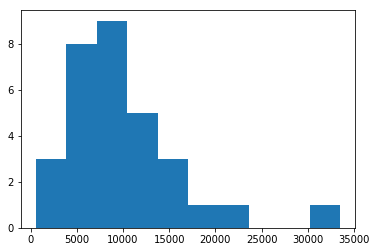

In [289]:
#Exploring a rough histogram of practice lists for cambridge, we
#see that there are much fewer practices and lower list sizes
x = cambs_gplookup.NUMBER_OF_PATIENTS

plt.hist(x)

In [290]:
#quick look at data types in order to do a sum calculation on the number of patients at each GP practice
cambs_gplookup.dtypes

PUBLICATION           object
EXTRACT_DATE          object
TYPE                  object
CCG_CODE              object
ONS_CCG_CODE          object
CODE                  object
POSTCODE              object
SEX                   object
AGE                   object
NUMBER_OF_PATIENTS     int64
dtype: object

In [291]:
#Thus, the answer to question 2a in the assignment is
#2a.  The total number of patients registered at GP practices in Cambridge
#as at 1 Apr 2018 is 311,579
Total_Patients = cambs_gplookup.NUMBER_OF_PATIENTS.sum()
print(Total_Patients)

311579


In [292]:
#next we use the Cambridge GP codes to select the subset of rows from
#the prescribing data, which gives us the april Cambs gp precribing data
cambs_gps = ["D81001", "D81002", "D81003", "D81005", "D81009", "D81012", "D81013", "D81016", "D81017", "D81025", "D81028", "D81033", "D81035", "D81037", "D81041", "D81042", "D81043", "D81044", "D81051", "D81054", "D81055", "D81056", "D81058", "D81066", "D81070", "D81078", "D81084", "D81086", "D81602", "D81607", "Y00056", "Y01778", "Y02991", "Y03550", "Y04602", "Y05839"]

april_presc.PRACTICE.isin(cambs_gps)

cambs_gp_precr= april_presc[april_presc.PRACTICE.isin(cambs_gps)]

cambs_gp_precr.shape

(40324, 11)

In [293]:
#exploring this data we see cambridge practice codes and presribing data
cambs_gp_precr.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,prescr,NIC,ACT COST,QUANTITY,PERIOD,
4183977,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,3,12.13,11.29,2300,201804,
4183978,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,14.85,13.91,1450,201804,
4183979,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,11.85,11.10,1000,201804,
4183980,Q56,06H,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,9.64,8.96,30,201804,
4183981,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,2,29.59,27.57,336,201804,


In [294]:
#cleaning up column headers
cambs_gp_precr.columns.tolist()

[' SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME                                    ',
 'prescr  ',
 'NIC        ',
 'ACT COST   ',
 'QUANTITY',
 'PERIOD',
 '                 ']

In [295]:
cambs_gp_precr.columns = cambs_gp_precr.columns.str.lower()

In [296]:
cambs_gp_precr.columns.tolist()

[' sha',
 'pct',
 'practice',
 'bnf code',
 'bnf name                                    ',
 'prescr  ',
 'nic        ',
 'act cost   ',
 'quantity',
 'period',
 '                 ']

In [297]:
#cleaning up the headers to allow sum calculation
cambs_gp_precr = cambs_gp_precr.rename(columns={'prescr  ': 'prescr'})
cambs_gp_precr = cambs_gp_precr.rename(columns={'act cost   ': 'actual_cost'})

In [298]:
#we can then answer part 2b - total number of prescriptions
#total number of presriptions in cambridge gp practices in april 2018
#is equal to 345,532 prescriptions
total_prescriptions = cambs_gp_precr.prescr.sum()
print(total_prescriptions)

345532


In [299]:
#next, part 2c - total actual cost of these prescriptions
#using the ACT COST column = £2,434,403.94
total_actual_cost = cambs_gp_precr.actual_cost.sum()
print(total_actual_cost)

2434403.94


In [300]:
#the next question 2d asks for the top 10 most frequent drugs prescribed

cambs_sorted= cambs_gp_precr.sort_values('prescr', axis=0, ascending=False, kind='quicksort', na_position='last')
cambs_top10 = cambs_sorted.head(10)
cambs_top10

,sha,pct,practice,bnf code,bnf name,prescr,nic,actual_cost,quantity,period,
4246482,Q56,06H,D81043,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,2087,1627.47,1536.47,75949,201804,
4246782,Q56,06H,D81043,0206020A0AAAAAA,Amlodipine_Tab 5mg,995,1390.98,1301.32,27239,201804,
4246901,Q56,06H,D81043,0212000B0AAABAB,Atorvastatin_Tab 20mg,955,670.96,632.75,25921,201804,
4246885,Q56,06H,D81043,0209000A0AAABAB,Aspirin Disper_Tab 75mg,817,258.14,250.44,21917,201804,
4246930,Q56,06H,D81043,0212000Y0AAADAD,Simvastatin_Tab 40mg,816,503.55,476.53,21693,201804,
4247799,Q56,06H,D81043,0602010V0AABZBZ,Levothyrox Sod_Tab 100mcg,740,726.37,683.25,21186,201804,
4247297,Q56,06H,D81043,0407010H0AAAMAM,Paracet_Tab 500mg,691,947.27,892.38,92043,201804,
4185511,Q56,06H,D81002,0212000B0AAABAB,Atorvastatin_Tab 20mg,685,483.24,460.21,19313,201804,
4247797,Q56,06H,D81043,0602010V0AABXBX,Levothyrox Sod_Tab 50mcg,678,645.04,608.60,18617,201804,
4247796,Q56,06H,D81043,0602010V0AABWBW,Levothyrox Sod_Tab 25mcg,644,1218.97,1143.22,18247,201804,


In [301]:
#from the output above, we see that the top 10 drugs prescribed
#in cambridge gp practices in april 2018 are - in descending order:
#1 - Omeprazole_Cap E/C 20mg
#2 - Amlodipine_Tab 5mg
#3 - Atorvastatin_Tab 20mg
#4 - Aspirin Disper_Tab 75mg
#5 - Simvastatin_Tab 40mg
#6 - Levothyrox Sod_Tab 100mcg
#7 - Paracet_Tab 500mg
#8 - Atorvastatin_Tab 20mg
#9 - Levothyrox Sod_Tab 50mcg
#10 - Levothyrox Sod_Tab 25mcg

In [302]:
#next part of the question 1e asks for the bottom 10 least frequent drugs prescribed
cambs_bottom10 = cambs_sorted.tail(10)
cambs_bottom10

,sha,pct,practice,bnf code,bnf name,prescr,nic,actual_cost,quantity,period,
4220605,Q56,06H,D81025,0304030C0BIACBG,Emerade_Auto Inj 1/1000 1mg/ml 0.5ml,1,26.99,25.04,1,201804,
4263256,Q56,06H,D81054,0604012P0AAAAAA,Norethist_Tab 5mg,1,4.12,3.83,60,201804,
4220604,Q56,06H,D81025,0304030C0BEABA3,Epipen_Auto-Inj 1/1000 1mg/ml 0.3ml,1,26.45,24.54,1,201804,
4220603,Q56,06H,D81025,0304010Y0AAABAB,Alimemazine Tart_Oral Soln 7.5mg/5ml,1,179.55,166.53,100,201804,
4220599,Q56,06H,D81025,0304010J0AAABAB,Hydroxyzine HCl_Tab 10mg,1,0.23,0.33,14,201804,
4220595,Q56,06H,D81025,0304010G0AAABAB,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.78,2.59,150,201804,
4263261,Q56,06H,D81054,0604020C0BBAAAA,Proscar_Tab 5mg,1,13.94,12.94,28,201804,
4263262,Q56,06H,D81054,0604020K0AABHBH,Testosterone_Gel 50mg/5g Ud Sach,1,62.22,57.71,60,201804,
4263263,Q56,06H,D81054,0604020K0AABKBK,Testosterone_Gel 50mg/5g Ud Tube,1,32.00,29.69,30,201804,
4327784,Q56,06H,Y05839,21210000012,Salivix Pastil (App),1,3.55,3.30,50,201804,


In [303]:
#from the output above, we see that the bottom 10 drugs prescribed
#in cambs gp practices in april 2018 are - in descending order:
#1 - Emerade_Auto Inj 1/1000 1mg/ml 0.5ml
#2 - Norethist_Tab 5mg
#3 - Epipen_Auto-Inj 1/1000 1mg/ml 0.3ml
#4 - Alimemazine Tart_Oral Soln 7.5mg/5ml
#5 - Hydroxyzine HCl_Tab 10mg
#6 - Chlorphenamine Mal_Oral Soln 2mg/5ml
#7 - Proscar_Tab 5mg
#8 - Testosterone_Gel 50mg/5g Ud Sach
#9 - Testosterone_Gel 50mg/5g Ud Tube
#10 - Salivix Pastil (App)

In [304]:
#Next, we are asked to use descriptive statistics to discuss and compare
#the london and cambridge findings for april 2018
#total patients registered (london=8,566,907) (cambridge=311,579)
#total no prescriptions (london=9,052,454) (cambridge=345,532)
#total actual costs of these prescriptions (london=£66,498,516.33) (cambridge=£2,434,403.94)
#top 10 and bottom 10 frequent drugs used (see above)

In [305]:
#calculate the mean, median, standard deviation, variance of practice lists
#london
A = np.array(london_gplookup.NUMBER_OF_PATIENTS)
print(np.mean(A))
print(np.median(A))
print(np.std(A))
print(np.var(A))

7495.106736657918
6689.0
4728.69728425336
22360578.0061051


In [306]:
#calculate the mean, median, standard deviation, variance of practice lists
#cambridge
B = np.array(cambs_gplookup.NUMBER_OF_PATIENTS)
print(np.mean(B))
print(np.median(B))
print(np.std(B))
print(np.var(B))

10050.935483870968
9063.0
6173.940196035654
38117537.54422477


In [307]:
#calculate the mean, median, standard deviation, variance of prescriptions
#london
C = np.array(london_gp_precr.prescr)
print(np.mean(C))
print(np.median(C))
print(np.std(C))
print(np.var(C))

7.434315710979602
2.0
22.007378969680538
484.3247291151372


In [308]:
#calculate the mean, median, standard deviation, variance of prescriptions
#cambridge
D = np.array(cambs_gp_precr.prescr)
print(np.mean(D))
print(np.median(D))
print(np.std(D))
print(np.var(D))

8.56889197500248
2.0
29.252103978962744
855.685587196048


In [309]:
#calculate the mean, median, standard deviation, variance of actual cost
#london
E = np.array(london_gp_precr.actual_cost)
print(np.mean(E))
print(np.median(E))
print(np.std(E))
print(np.var(E))

54.61181738222063
18.0
136.42913638401734
18612.909254488804


In [310]:
#calculate the mean, median, standard deviation, variance of actual cost
#cambridge
F = np.array(cambs_gp_precr.actual_cost)
print(np.mean(F))
print(np.median(F))
print(np.std(F))
print(np.var(F))

60.37109264953874
19.92
156.95650882944813
24635.345663928623


In [311]:
#Patients registered
#City       n(total lists)       mean       stdev     
#London     8,566,907            7,495      4,728.7
#Cambridge  311,579              10,051     6,173.9

#Number prescriptions
#City       n(total prescr)      mean       stdev     
#London     9,052,454            7.43       22.0
#Cambridge  345,532              8.57       29.3

#Actual costs
#City       n(total prescr)      mean       stdev     
#London     £66,498,516.33       £54.61     £136.40
#Cambridge  £2,434,403.94        £60.37     £156.95

60.37109264953874
19.92
156.95
#total patients registered (london=8,566,907) (cambridge=311,579)
#total no prescriptions (london=9,052,454) (cambridge=345,532)
#total actual costs of these prescriptions (london=£66,498,516.33) (cambridge=£2,434,403.94)

156.95

In [312]:
#two sample t-test - patients registered
import math
n1 = 8566907
n2 = 311579

mean1 = 7495
mean2 = 10051

std1 = 4728.7
std2 = 6173.9

se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)
print(se1)
print(se2)

1.615584716376952
11.060518876315497


In [313]:
sed = math.sqrt(se1**2.0 + se2**2.0)
print(sed)

11.177888521054511


In [314]:
t_stat = (mean1 - mean2) / sed
print(t_stat)

-228.66572655341434


In [315]:
df = len(london_gplookup.NUMBER_OF_PATIENTS) + len(cambs_gplookup.NUMBER_OF_PATIENTS) - 2
print(df)

1172


In [316]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import sem
from scipy.stats import t

alpha = 0.05
cv = t.ppf(1.0 - alpha, df)

In [317]:
p = (1 - t.cdf(abs(t_stat), df)) * 2
print(p)

0.0


In [318]:

print(t_stat)
print(df)
print(cv)
print(p)

-228.66572655341434
1172
1.6461548058258575
0.0


In [319]:
#now for something different - next question

In [320]:
#select just cardiovascular drugs - bnf codes starting with '02' from april prescribing data all practices
april_presc[april_presc['BNF CODE'].str.startswith('02')]


,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,prescr,NIC,ACT COST,QUANTITY,PERIOD,
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804,
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804,
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804,
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804,
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804,
340,Q44,RXA,Y00327,0204000E0AAABAB,Atenolol_Tab 50mg,1,0.08,0.19,5,201804,
341,Q44,RXA,Y00327,0204000E0AAACAC,Atenolol_Tab 100mg,1,0.05,0.16,3,201804,
342,Q44,RXA,Y00327,0204000H0AAABAB,Bisoprolol Fumar_Tab 10mg,1,0.45,0.43,28,201804,
343,Q44,RXA,Y00327,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,2,1.78,1.68,56,201804,
344,Q44,RXA,Y00327,0205051R0AAAKAK,Ramipril_Tab 1.25mg,1,0.30,0.39,7,201804,


In [321]:
chapter_2 = april_presc[april_presc['BNF CODE'].str.startswith('02')]

In [322]:
chapter_2.shape

(1330453, 11)

In [361]:
#Calculate the total actual cost of cardiovascular prescriptions in april 2018

cardiovascular_costs = chapter_2.actual_cost.sum()

In [362]:
cardiovascular_costs

90193834.01999994

In [ ]:
#the total actual costs of cardiovascular drugs in April 2018 across all practices is £90,193,834.02

In [323]:
chapter_4pt3 = april_presc[april_presc['BNF CODE'].str.startswith('0403')]

In [363]:
chapter_4pt3.head(5)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,prescr,NIC,ACT COST,QUANTITY,PERIOD,
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804,
10,Q44,RTV,Y04937,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,1,1.17,1.20,14,201804,
11,Q44,RTV,Y04937,0403030D0AAABAB,Citalopram Hydrob_Tab 10mg,1,0.76,0.82,14,201804,
12,Q44,RTV,Y04937,0403030P0AAAGAG,Paroxetine HCl_Oral Soln 10mg/5ml S/F,1,15.99,14.94,263,201804,
13,Q44,RTV,Y04937,0403030P0AAAKAK,Paroxetine HCl_Tab 10mg,1,16.50,15.41,49,201804,


In [366]:
antidepressants_costs = chapter_4pt3['ACT COST   '].sum()

In [367]:
antidepressants_costs

16853470.86

In [ ]:
#the total actual costs of antidepressants in April 2018 across all practices is £16,853,470.86

In [325]:
chapter_2.groupby('BNF CODE')['ACT COST   '].sum()

BNF CODE
0201010F0AAAAAA      7216.87
0201010F0AAADAD    102511.62
0201010F0AAAEAE    185641.31
0201010F0AAAFAF     40590.33
0201010F0BBAAAE       209.46
0201010F0BBABAF        88.57
0201010F0BBADAD       104.44
0201010F0BBAEAA       258.37
0202010B0AAABAB    288587.92
0202010B0AAACAC      8017.94
0202010B0AAAQAQ       191.71
0202010B0AAAXAX      1682.19
0202010B0BBAAAB         8.96
0202010B0BEABAB         0.32
0202010D0AAAFAF       528.63
0202010D0AAAUAU      8843.07
0202010D0AABCBC      2684.66
0202010D0AABIBI       751.23
0202010D0AABJBJ       286.21
0202010D0AACYCY      2332.68
0202010D0AADDDD      1769.00
0202010D0AADEDE      6550.34
0202010D0AADFDF       584.28
0202010D0BCAAAU      1462.49
0202010F0AAAAAA     80870.81
0202010L0AAABAB      8034.58
0202010L0AAACAC       112.98
0202010L0AAATAT       417.82
0202010L0AAAYAY       525.17
0202010P0AAAAAA    222033.58
                     ...    
0212000P0AAAEAE     71694.55
0212000P0AAAFAF        14.60
0212000P0BBABAB      6009.86
02120

In [326]:
chapter_2.columns.tolist()


[' SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME                                    ',
 'prescr  ',
 'NIC        ',
 'ACT COST   ',
 'QUANTITY',
 'PERIOD',
 '                 ']

In [327]:
chapter_2 = chapter_2.rename(columns={'prescr  ': 'prescr'})
chapter_2 = chapter_2.rename(columns={'ACT COST   ': 'actual_cost'})
chapter_2 = chapter_2.rename(columns={'BNF NAME                                    ': 'bnf_name'})

In [328]:
chapter_2.head()

,SHA,PCT,PRACTICE,BNF CODE,bnf_name,prescr,NIC,actual_cost,QUANTITY,PERIOD,
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804,
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804,
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804,
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804,
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804,


In [329]:
type(chapter_2)

pandas.core.frame.DataFrame

In [330]:


drug_costs = chapter_2.groupby(['BNF CODE','bnf_name']).sum()


In [331]:
drug_costs.head(10)

,,prescr,NIC,actual_cost,QUANTITY,PERIOD
BNF CODE,bnf_name,,,,,
0201010F0AAAAAA,Digoxin_Oral Soln Paed 50mcg/ml,1235,7768.20,7216.87,87120,183036228
0201010F0AAADAD,Digoxin_Tab 62.5mcg,79367,106602.17,102511.62,1904145,1355315664
0201010F0AAAEAE,Digoxin_Tab 125mcg,141057,193988.10,185641.31,3608018,1416058668
0201010F0AAAFAF,Digoxin_Tab 250mcg,25483,42923.53,40590.33,773394,1133331264
0201010F0BBAAAE,Lanoxin-125_Tab 125mcg,403,179.41,209.46,11139,10493808
0201010F0BBABAF,Lanoxin_Tab 250mcg,152,77.70,88.57,4819,9081180
0201010F0BBADAD,Lanoxin-PG_Tab 62.5mcg,190,90.01,104.44,5586,10292004
0201010F0BBAEAA,Lanoxin-PG_Paed Elix 50mcg/ml,36,278.20,258.37,3120,5650512
0202010B0AAABAB,Bendroflumethiazide_Tab 2.5mg,813364,292085.70,288587.92,29181592,1475590848


In [332]:
type(drug_costs)

pandas.core.frame.DataFrame

In [334]:
drug_costs.dtypes

prescr           int64
NIC            float64
actual_cost    float64
QUANTITY         int64
PERIOD           int64
dtype: object

In [335]:
sorted = drug_costs.sort_values(by=['actual_cost'])



In [336]:
sorted.tail()

,,prescr,NIC,actual_cost,QUANTITY,PERIOD
BNF CODE,bnf_name,,,,,
0208020Y0AAABAB,Rivaroxaban_Tab 15mg,75747,3084802.20,2864747.23,1713779,1289325756
0212000L0AAAAAA,Ezetimibe_Tab 10mg,142031,4315627.30,4006482.11,4592773,1420901964
0208020Z0AAAAAA,Apixaban_Tab 2.5mg,127975,5554284.25,5161392.03,5846615,1402941408
0208020Z0AAABAB,Apixaban_Tab 5mg,219971,11389346.70,10569680.46,11988786,1457630292
0208020Y0AAACAC,Rivaroxaban_Tab 20mg,228645,11954784.60,11094375.29,6641547,1455814056


In [337]:
ch2_actcosts.head(60)

NameError: name 'ch2_actcosts' is not defined

In [338]:
ch2_actcosts.dtypes

NameError: name 'ch2_actcosts' is not defined

In [339]:
#For total spending, it is assumed the question is asking for all spending
#accross all GP practices nationwide (not just London & Cambridge), and
#that it is all prescriptions entirely, and for the month of April 2018
april_presc.columns.tolist()

[' SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME                                    ',
 'prescr  ',
 'NIC        ',
 'ACT COST   ',
 'QUANTITY',
 'PERIOD',
 '                 ']

In [340]:
#this is the total actual costs of all prescriptions for all practices
#for April 2018
total_costs = april_presc['ACT COST   '].sum()

print(total_costs)



643187390.1999997


In [341]:
total_costs_practices =pd.DataFrame(april_presc.groupby(april_presc.PRACTICE).apply(lambda subf: subf['ACT COST   '].sum()))
total_costs_practices.columns = ['total_costs_per_practice']
# Reseting the index
total_costs_practices.reset_index(inplace=True)
total_costs_practices.head()


,PRACTICE,total_costs_per_practice
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


(0, 80000)

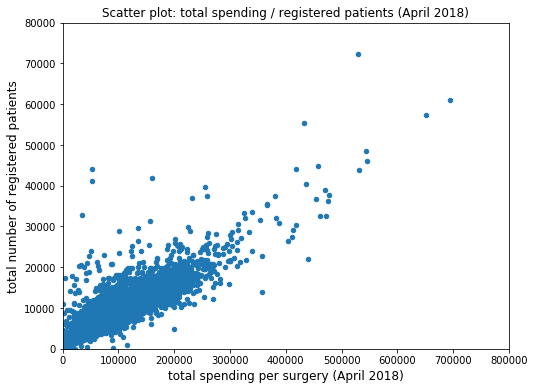

In [342]:
merged = pd.merge(total_costs_practices, gp_practices[['CODE', 'NUMBER_OF_PATIENTS']], left_on='PRACTICE' , right_on='CODE')
ax3=merged.plot(kind='scatter', x='total_costs_per_practice', y='NUMBER_OF_PATIENTS', title='Scatter plot: total spending / registered patients (April 2018)', figsize=(8,6))
ax3.set_xlabel("total spending per surgery (April 2018)",fontsize=12)
ax3.set_ylabel("total number of registered patients",fontsize=12)
ax3.set_xlim(0, 800000)
ax3.set_ylim(0, 80000)




(0, 72227)

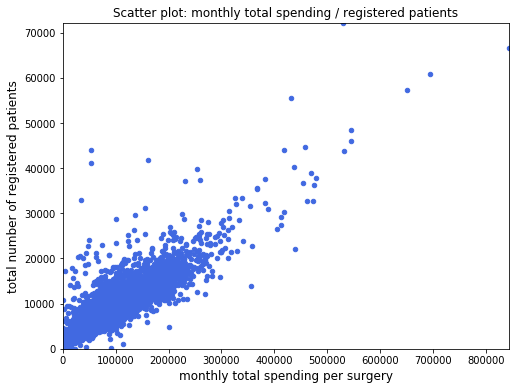

In [343]:


from math import floor
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.NUMBER_OF_PATIENTS.max())

ax4=merged.plot(kind='scatter', x='total_costs_per_practice', y='NUMBER_OF_PATIENTS', title='Scatter plot: monthly total spending / registered patients', 
                color='royalblue', figsize=(8,6))
ax4.set_xlabel("monthly total spending per surgery",fontsize=12)
ax4.set_ylabel("total number of registered patients",fontsize=12)
ax4.set_xlim(0, max_x)
ax4.set_ylim(0, max_y)

In [344]:
gp_practices.columns.tolist()

['PUBLICATION',
 'EXTRACT_DATE',
 'TYPE',
 'CCG_CODE',
 'ONS_CCG_CODE',
 'CODE',
 'POSTCODE',
 'SEX',
 'AGE',
 'NUMBER_OF_PATIENTS']

In [345]:
merged.columns.tolist()

['PRACTICE', 'total_costs_per_practice', 'CODE', 'NUMBER_OF_PATIENTS']

(0, 72227)

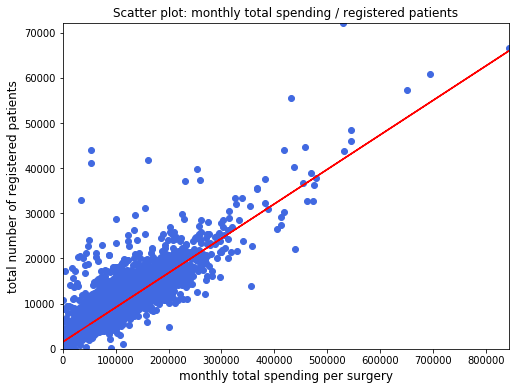

In [346]:


# plot those data points
#fig, ax = plt.subplots()
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= merged['total_costs_per_practice']
y = merged['NUMBER_OF_PATIENTS']
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("monthly total spending per surgery",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.NUMBER_OF_PATIENTS.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

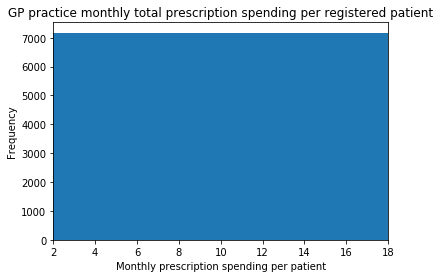

In [347]:
cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['NUMBER_OF_PATIENTS'] 

x = cost_patient_plot.cost_per_patient.values

plt.hist(x, bins=75)
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['cost_per_patient'].quantile(.01))
max_x = floor(cost_patient_plot['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()

In [348]:
merged.head()

,PRACTICE,total_costs_per_practice,CODE,NUMBER_OF_PATIENTS,cost_per_patient
0,A81001,52194.63,A81001,4086,12.774016
1,A81002,268607.26,A81002,19906,13.493784
2,A81004,139115.40,A81004,10165,13.685726
3,A81005,102914.06,A81005,8016,12.838580
4,A81006,183226.79,A81006,14497,12.638945


In [349]:
cost_patient_plot.cost_per_patient.values

array([12.77401615, 13.49378378, 13.68572553, ..., 11.08252614,
       10.42213494,  5.77101073])

(array([  28.,   28.,   39.,  104.,  199.,  348.,  440.,  662.,  806.,
         995., 1100.,  878.,  633.,  435.,  233.,  102.,   45.,   24.,
          12.,   11.,    6.,    4.,    2.,    0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 24 Patch objects>)

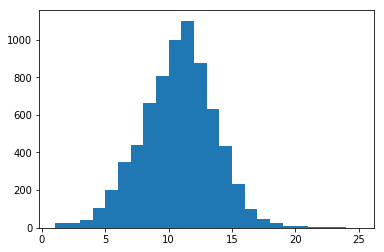

In [350]:

cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['NUMBER_OF_PATIENTS'] 

x = cost_patient_plot.cost_per_patient.values


plt.hist(x,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

(array([  28.,   28.,   39.,  104.,  199.,  348.,  440.,  662.,  806.,
         995., 1100.,  878.,  633.,  435.,  233.,  102.,   45.,   24.,
          12.,   11.,    6.,    4.,    2.,    0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 24 Patch objects>)

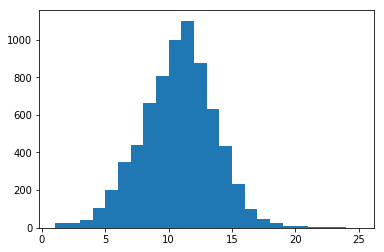

In [351]:

cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['NUMBER_OF_PATIENTS'] 

x = cost_patient_plot.cost_per_patient.values


plt.hist(x,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [352]:
x

array([12.77401615, 13.49378378, 13.68572553, ..., 11.08252614,
       10.42213494,  5.77101073])

In [353]:
from scipy import stats
stats.describe(x)
#np.std(x)

DescribeResult(nobs=7191, minmax=(0.0017235056839017236, 2830.0200000000004), mean=11.60649702182044, variance=1510.794960549969, skewness=61.27267967093751, kurtosis=4121.292439119283)

/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


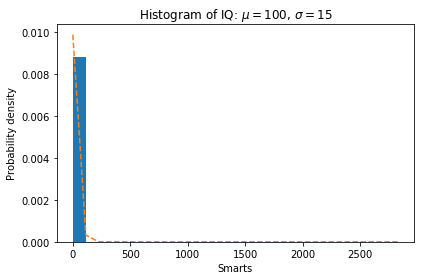

/Users/michaelshemko/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


In [354]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data:
#mu, std = norm.fit(x)

# Plot the histogram.
#plt.hist(x,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], range=[1, 25])
#plt.xlim(xmin=1, xmax = 25)
#bins=25
#y = mlab.normpdf(bins,mu,std)
#plt.plot(bins,y,'r--',linewidth=2)


mu = 11.6  # mean of distribution
sigma = 38.6  # standard deviation of distribution



num_bins = 25

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


#num_bins = 50

y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

range=[6.5, 12.5]

In [355]:
c

array([12.77401615, 13.49378378, 13.68572553, ..., 11.08252614,
       10.42213494,  5.77101073])

In [356]:
x


array([12.77401615, 13.49378378, 13.68572553, ..., 11.08252614,
       10.42213494,  5.77101073])